In [18]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.14.0


In [19]:
#necessary imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


In [20]:
#import dataset
df = pd.read_csv('./data/dataset.csv')
df.head()

,Unnamed: 0,home_last_3_P,home_last_3_OppP,home_last_3_FG,home_last_3_FGA,home_last_3_FG%,home_last_3_3P,home_last_3_3PA,home_last_3_3P%,home_last_3_FT,...,away_last_50_DeFG%,away_last_50_DTOV%,away_last_50_DDRB%,away_last_50_DFT/FGA,away_last_50_W,away_last_50_H,Date,Home_Team,Away_Team,Home_Team_Won
0,0,112.33,106.33,42.33,84.67,0.50,11.33,31.33,0.36,16.33,...,0.51,12.67,76.90,0.18,41.0,27.0,2022-02-03,ATL,PHO,True
1,0,110.67,114.33,41.33,90.67,0.46,11.33,31.33,0.34,16.67,...,0.53,11.26,77.10,0.21,18.0,26.0,2022-02-08,ATL,IND,True
2,0,113.67,113.33,44.00,92.67,0.48,10.33,29.00,0.34,15.33,...,0.53,11.25,75.18,0.17,19.0,26.0,2022-02-11,ATL,SAS,False
3,0,116.33,117.67,44.33,95.33,0.47,14.33,38.00,0.39,13.33,...,0.50,11.99,76.40,0.16,32.0,25.0,2022-02-15,ATL,CLE,True
4,0,120.67,112.33,43.00,89.00,0.49,13.33,31.33,0.42,21.33,...,0.54,13.79,74.56,0.21,27.0,24.0,2022-02-26,ATL,TOR,True


In [21]:
#We want clean the data and split up the input and output
target_column = "Home_Team_Won"
unneeded_columns = ["Date",	"Home_Team", "Away_Team"]

#remove first column from dataset
df = df.drop(df.columns[[0]],axis = 1)

#remove unneed_columns. These are columns that are in our dataset, but we don't want to feed into the model
#this is because they are categorical, we're only feeding our model numerical data
clean_df = df.drop(columns=unneeded_columns, axis=1)

# making new data frame with dropped NA values
clean_df = clean_df.dropna(axis=0, how='any')

#get the output rows of the dataset
output_rows = clean_df[target_column]

#remove output rows from the dataset
clean_df = clean_df.drop(columns=target_column, axis=1)

clean_df.head()

,home_last_3_P,home_last_3_OppP,home_last_3_FG,home_last_3_FGA,home_last_3_FG%,home_last_3_3P,home_last_3_3PA,home_last_3_3P%,home_last_3_FT,home_last_3_FTA,...,away_last_50_OeFG%,away_last_50_OTOV%,away_last_50_OORB%,away_last_50_OFT/FGA,away_last_50_DeFG%,away_last_50_DTOV%,away_last_50_DDRB%,away_last_50_DFT/FGA,away_last_50_W,away_last_50_H
0,112.33,106.33,42.33,84.67,0.50,11.33,31.33,0.36,16.33,22.67,...,0.54,11.55,22.63,0.18,0.51,12.67,76.90,0.18,41.0,27.0
1,110.67,114.33,41.33,90.67,0.46,11.33,31.33,0.34,16.67,19.67,...,0.52,11.71,25.02,0.18,0.53,11.26,77.10,0.21,18.0,26.0
2,113.67,113.33,44.00,92.67,0.48,10.33,29.00,0.34,15.33,17.67,...,0.52,10.79,24.07,0.15,0.53,11.25,75.18,0.17,19.0,26.0
3,116.33,117.67,44.33,95.33,0.47,14.33,38.00,0.39,13.33,15.33,...,0.54,12.56,23.80,0.19,0.50,11.99,76.40,0.16,32.0,25.0
4,120.67,112.33,43.00,89.00,0.49,13.33,31.33,0.42,21.33,27.33,...,0.51,10.69,27.32,0.18,0.54,13.79,74.56,0.21,27.0,24.0


In [22]:
#we cleaned up our data, now we are going to split it and get it ready to feed into the model
X_train, X_test, y_train, y_test = train_test_split(clean_df, output_rows, test_size=0.25, random_state=0)

#now we have our training and testing dataset
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (1392, 228)
y_train: (1392,)
X_test: (464, 228)
y_test: (464,)


In [23]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.6206896551724138
F1 Score: 0.6206896551724138


      home_last_3_P  home_last_3_OppP  home_last_3_FG  home_last_3_FGA  \
548          107.67            113.00           38.33            82.00   
436          119.00            115.67           41.33            85.67   
990          117.33            118.67           40.33            85.00   
1513         104.33            125.67           37.00            87.67   
18           112.00            120.33           42.67            95.00   

      home_last_3_FG%  home_last_3_3P  home_last_3_3PA  home_last_3_3P%  \
548              0.47           14.67            37.67             0.39   
436              0.48           15.33            41.00             0.37   
990              0.48           13.00            33.33             0.40   
1513             0.42            8.00            29.00             0.28   
18               0.45           12.00            30.67             0.39   

      home_last_3_FT  home_last_3_FTA  ...  away_last_50_OeFG%  \
548            16.33            24.00 

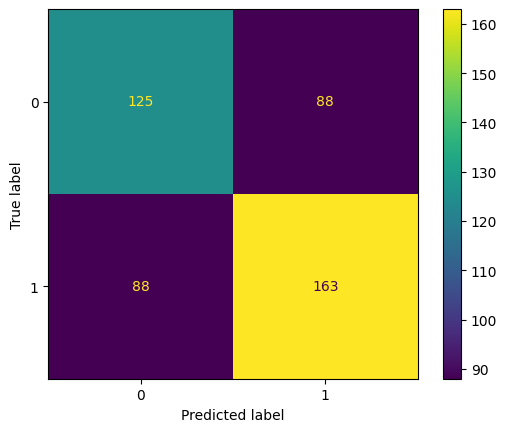

In [30]:
#e valuate the results
y_pred = model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();


In [25]:
#save model
import pickle
pickle.dump(model, open('./models/naive_bayes.sav', 'wb'))